In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/titanic.csv


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


'''1. Data Preprocessing:
• Load the Titanic dataset (titanic.csv).
• Preprocess the dataset by handling missing values and removing unnecessary columns.
• Convert categorical data into numeric format using techniques like one-hot encoding or
label encoding.'''


# Load dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/titanic.csv')

# Preprocessing
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [5]:
'''2. Normalization:
• If necessary, normalize the numeric features to ensure that they are on a similar scale.'''
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [6]:
'''3. Model Training:
• Train a predictive model using both scikit-learn and Keras with the following parameters:
• Model: MLP for scikit-learn, and deep neural networks with different numbers of
hidden layers and units for Keras.
• Use the same parameters for the sklearn and keras models and vary the parameters
(number of hidden layers and units) for the neural networks.
• Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
• Train the models on the training data.'''



# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define a list of MLPClassifier models with different architectures
models_MLP = [
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),  # Single hidden layer with 10 neurons
    MLPClassifier(hidden_layer_sizes=(10,20), max_iter=100),  # Two hidden layers with 10 and 20 neurons respectively
    MLPClassifier(hidden_layer_sizes=(10, 20, 50), max_iter=100),  # Three hidden layers with 10, 20, and 50 neurons respectively
    MLPClassifier(hidden_layer_sizes=(10, 20, 50, 100), max_iter=100)  # Four hidden layers with 10, 20, 50, and 100 neurons respectively
]




(712, 7) (179, 7) (712,) (179,)


In [7]:
# Define a list of Keras Sequential models with different architectures
Models_Keras = [
    Sequential([
        Dense(10, input_dim=7, activation='relu'),  # First layer with 10 neurons and ReLU activation
        Dense(1, activation='sigmoid')  # Output layer with 1 neuron (binary classification) and sigmoid activation
    ]),
    Sequential([
        Dense(10, input_dim=7, activation='relu'),  # First layer with 10 neurons and ReLU activation
        Dense(20, activation='relu'),  # Second layer with 20 neurons and ReLU activation
        Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
    ]),
    Sequential([
        Dense(10, input_dim=7, activation='relu'),  # First layer with 10 neurons and ReLU activation
        Dense(20, activation='relu'),  # Second layer with 20 neurons and ReLU activation
        Dense(50, activation='relu'),  # Third layer with 50 neurons and ReLU activation
        Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
    ]),
    Sequential([
        Dense(10, input_dim=7, activation='relu'),  # First layer with 10 neurons and ReLU activation
        Dense(20, activation='relu'),  # Second layer with 20 neurons and ReLU activation
        Dense(50, activation='relu'),  # Third layer with 50 neurons and ReLU activation
        Dense(100, activation='relu'),  # Fourth layer with 100 neurons and ReLU activation
        Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
    ])
]

In [8]:
# Initialize an empty list to store the accuracy of each model
accuracy_mlp = []

# Loop over each model in the list
for model in models_MLP:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the trained model to predict the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model and append it to the accuracy list
    accuracy_mlp.append(accuracy_score(y_test, y_pred))
    
    # Print the accuracy of the current model
    print(accuracy_score(y_test, y_pred))
    

0.776536312849162
0.8100558659217877
0.8156424581005587
0.8156424581005587


In [9]:


# Initialize an empty list to store the accuracy of each model
accuracy_keras = []

# Loop over each model in the list
for model in Models_Keras:
    # Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as the metric
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the training data for 20 epochs
    model.fit(X_train, y_train, epochs=20)
    
    # Evaluate the model on the test data and get the loss and accuracy
    _, accuracy = model.evaluate(X_test, y_test)

    # Append the accuracy to the accuracy list
    accuracy_keras.append(accuracy)
    
    # Print the accuracy of the current model
    print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5226 - loss: 0.6606
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.6324
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7715 - loss: 0.6067
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7881 - loss: 0.5681
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.5521
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.5324
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7858 - loss: 0.5242
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.5110 
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4925 
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.5068 
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4826 
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 

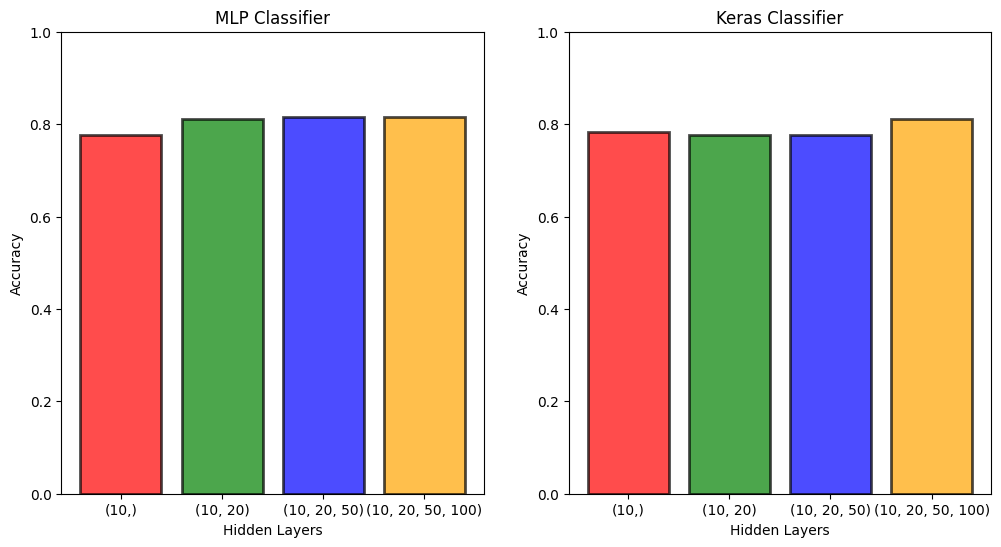

In [10]:
# Plotting

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(4), accuracy_mlp, color= ['red', 'green', 'blue', 'orange'], alpha=0.7, edgecolor='black', linewidth=2, tick_label=['(10,)', '(10, 20)', '(10, 20, 50)', '(10, 20, 50, 100)'])
plt.title('MLP Classifier')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])


plt.subplot(1, 2, 2)
plt.bar(range(4), accuracy_keras, color= ['red', 'green', 'blue', 'orange'], alpha=0.7, edgecolor='black', linewidth=2, tick_label=['(10,)', '(10, 20)', '(10, 20, 50)', '(10, 20, 50, 100)'])
plt.title('Keras Classifier')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.show()